In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set_palette('mako_r')

In [2]:
df = pd.read_csv('data/kc_house_data_cleaned.csv')
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement,renovated
0,221900,3,1.00,1180,5650,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0,0
1,538000,3,2.25,2570,7242,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1,1
2,180000,2,1.00,770,10000,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0,0
3,604000,4,3.00,1960,5000,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1,0
4,510000,3,2.00,1680,8080,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0,0


In [3]:
df.shape

(17611, 20)

## Baseline model

_A baseline is the result of a very basic model with no feature engineering / Trasnformation/ Data Modification. You generally create a baseline model and then try to make more complex solutions in order to get a better result._

So let's go ahead and see how our model performs withhout making any changes and running the model with the data as it was given. to do so we will remove `basement` and `renovated` column beacuse they were not present initially in the dataset.

In [4]:
def run_model(features, target, features_not_to_use=[]):
    
    X = features.drop(features_not_to_use, axis=1)
    y = target

    model = sm.OLS(y, sm.add_constant(X)).fit()
    return model

In [5]:
features_basline = df.drop(columns=['price','basement','renovated'], axis=1)

X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(features_basline, df['price'], random_state=55, test_size=0.2)
model = run_model(X_train_baseline, y_train_baseline)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     1949.
Date:                Mon, 07 Jun 2021   Prob (F-statistic):               0.00
Time:                        09:37:36   Log-Likelihood:            -1.8353e+05
No. Observations:               14088   AIC:                         3.671e+05
Df Residuals:                   14071   BIC:                         3.672e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.068e+06   1.99e+06     -0.535      0.592   -4.98e+06    2.84e+06
bedrooms      -1.014e+04   1434.451     -7.070      0.000    -1.3e+04   -7329.840
bathrooms      1.956e+04   2291.321      8.537      0.000    1.51e+04    2.41e+04
sqft_living      58.0309      1.928     30.091      0.000      54.251      61.811
sqft_lot         -2.6497      0.570     -4.645      0.000      -3.768      -1.532
waterfront     1.945e+05    2.4e+04      8.113      0.000    1.48e+05    2.42e+05
view            3.11e+04   1805.170     17.230      0.000    2.76e+04    3.46e+04
condition      2.706e+04   1594.003     16.977      0.000    2.39e+04    3.02e+04
grade          7.808e+04   1570.803     49.708      0.000     7.5e+04    8.12e+04
sqft_above       36.2585      1.679     21.590      0.000      32.967      39.550
sqft_basement    21.7726      1.954     11.142      0.000      17.942      25.603
yr_built      -1854.3642     48.930    -37.899      0.000   -1950.273   -1758.456
yr_renovated     20.4347      2.698      7.574      0.000      15.147      25.723
zipcode        -260.6081     22.475    -11.596      0.000    -304.661    -216.555
lat            5.485e+05   7320.554     74.929      0.000    5.34e+05    5.63e+05
long          -3.079e+04   9370.122     -3.286      0.001   -4.92e+04   -1.24e+04
sqft_living15    49.3244      2.813     17.537      0.000      43.811      54.838
sqft_lot15       -5.6025      0.645     -8.690      0.000      -6.866      -4.339
==============================================================================
Omnibus:                     1293.869   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2393.407
Skew:                           0.634   Prob(JB):                         0.00
Kurtosis:                       4.571   Cond. No.                     9.20e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.62e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [6]:
basline_lrm = LinearRegression()
basline_lrm.fit(X_train_baseline,y_train_baseline)

LinearRegression()

In [7]:
y_predict_baseline = basline_lrm.predict(X_test_baseline)

In [8]:
baseline_r_sqr_train = basline_lrm.score(X_train_baseline, y_train_baseline)
baseline_r_sqr_test = basline_lrm.score(X_test_baseline, y_test_baseline)

print(f"R square of TRAIN = {baseline_r_sqr_train} \nR square of TEST = {baseline_r_sqr_test}")

R square of TRAIN = 0.6890929985679782 
R square of TEST = 0.674491601552327


In [9]:
baseline_rmse_train = np.sqrt(mean_squared_error(y_test_baseline, y_predict_baseline))
print(f"RMSE of TRAIN = {baseline_rmse_train}")

RMSE of TRAIN = 112151.93163754391


baseline_intercept = basline_lrm.intercept_
print(f"INTERCEPT = {baseline_rmse_train}")

### Checking the assumptions

#### 1. Linearity

<Figure size 2500x800 with 0 Axes>

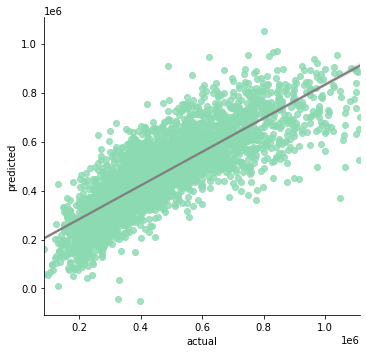

In [10]:
actual_predict = pd.DataFrame(data=[y_predict_baseline, y_test_baseline], index=['predicted','actual']).T

fig = plt.figure(figsize=(25,8),dpi=100)
sns.lmplot(x='actual', y='predicted',data=actual_predict, fit_reg=True,line_kws={'color': 'grey'})

#### Observation 
---
    - There seems to be a linear relation.

#### 2. Normality of residuals

In [11]:
residuals = y_test_baseline - y_predict_baseline

<AxesSubplot:ylabel='Density'>

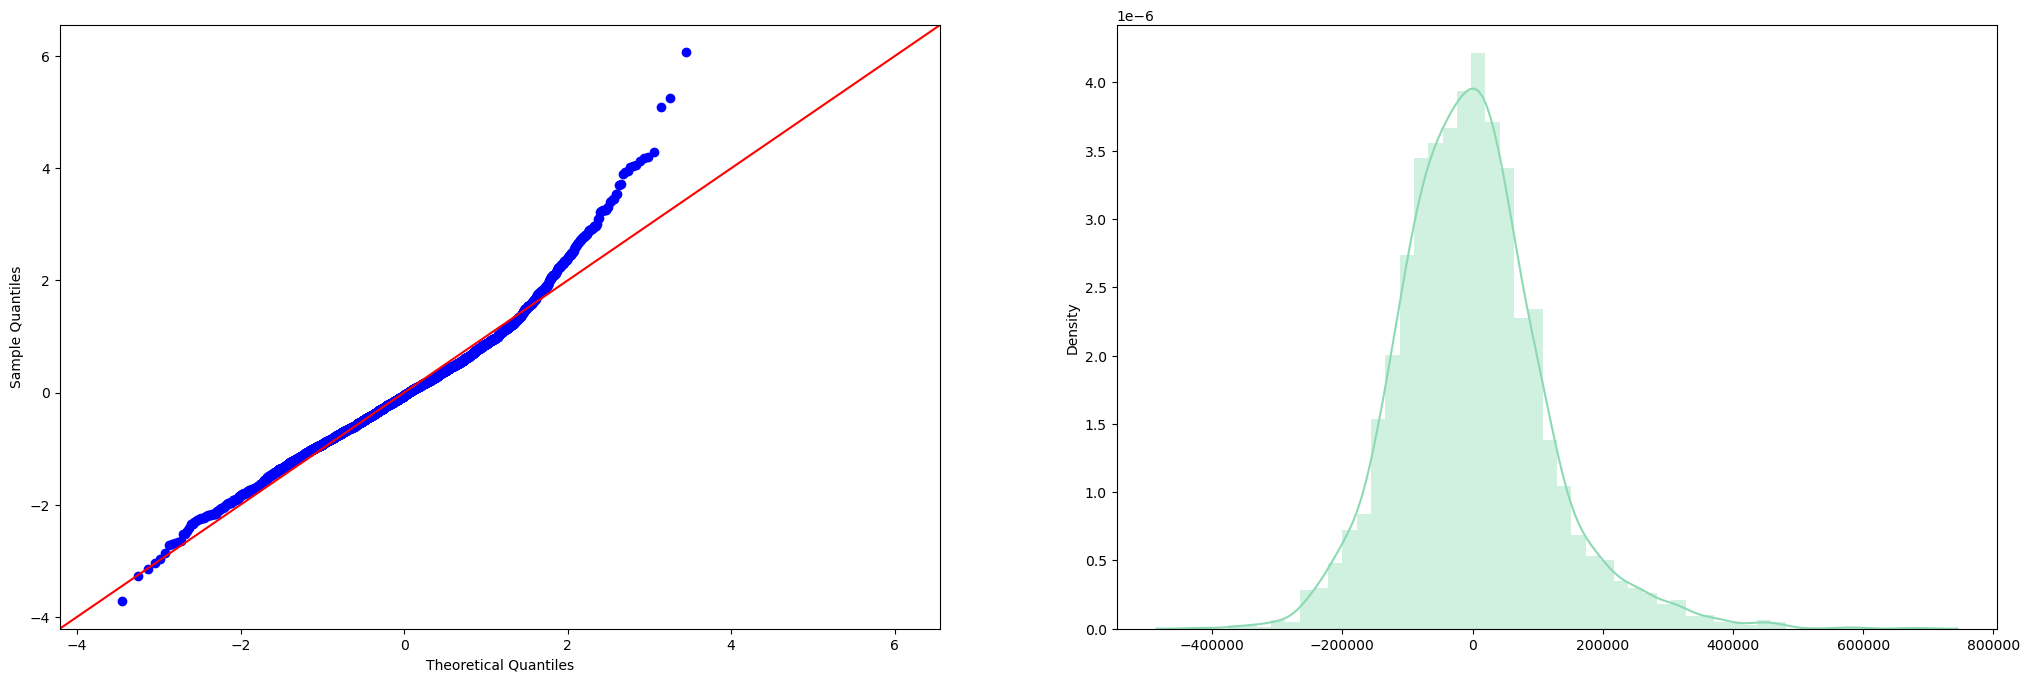

In [12]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(25,8),dpi=100)

axes = axes.flatten()
sm.graphics.qqplot(residuals, dist=stats.norm, fit=True, line='45', ax=axes[0])
sns.distplot(x=residuals, ax=axes[1])

In [13]:
p_value = shapiro(residuals)
if p_value[1] < 0.05:
    print('Null hypothesis Rejected')
else:
    print('Faild to reject null hypothesis')

Null hypothesis Rejected


#### Observation 
---
    - QQ-plot and Histogram shows that it is not normally distributed and also we reject null hypothesis based on p value using shapiro.

#### 3. No Multicollinearity

In [14]:
data_corr = X_train_baseline.corr()

<AxesSubplot:>

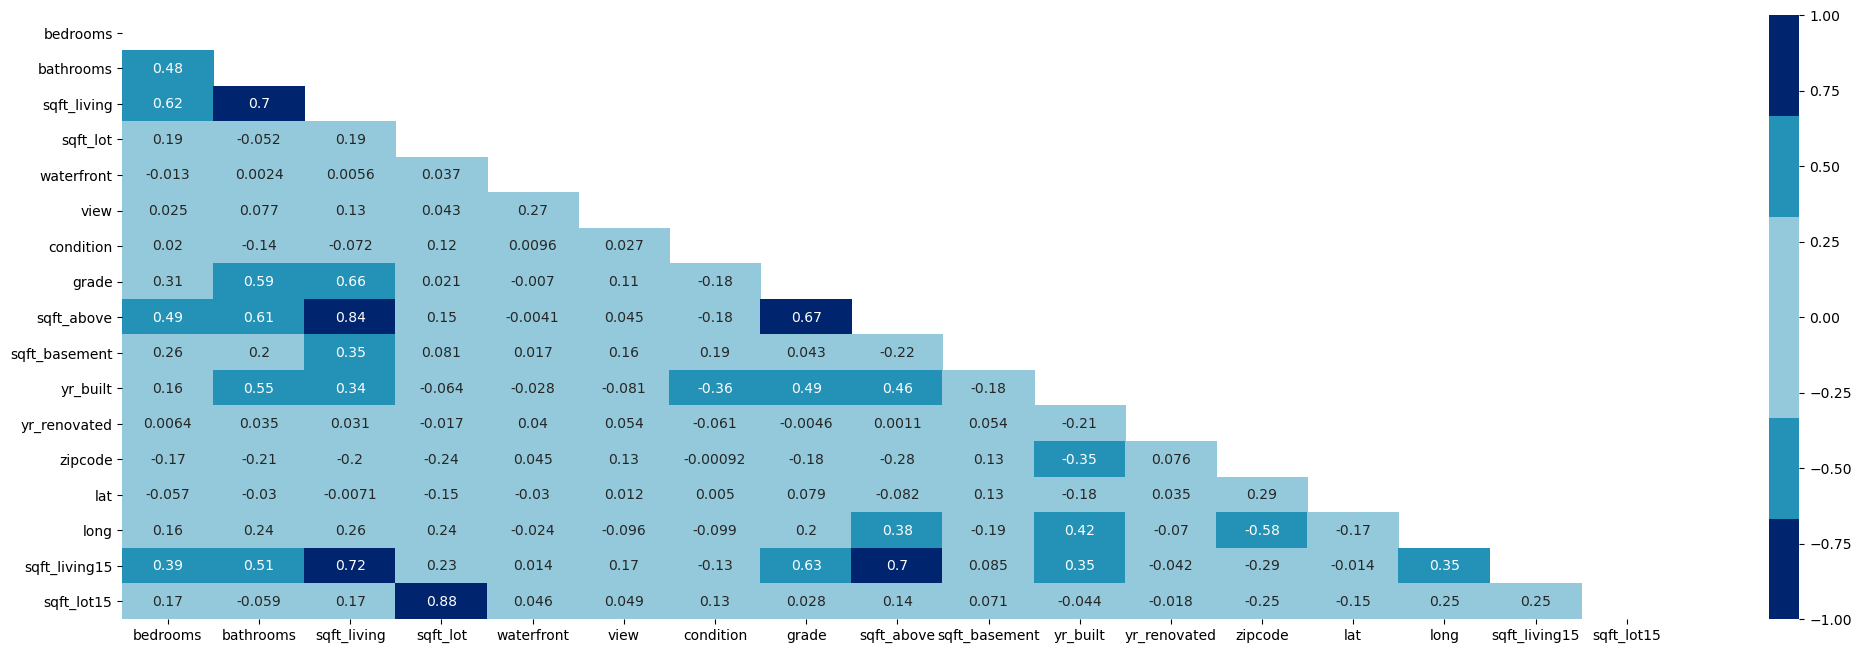

In [15]:
plt.figure(figsize=(25,8),dpi=100)
pal = ['#00246d', '#2492b6', '#93c9db', '#93c9db', '#2492b6', '#00246d']
mask = np.triu(np.ones_like(data_corr, dtype=np.int))
sns.heatmap(data_corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap=pal)

#### Observation 
---
    - sqft_living and sqft_above are highly correlated.
    - sqft_basement and basement are highly correlated.
    - sqft_above, sqft_living vs grade needs investigating as they are correlated and relation between sqft and grading of house does not fit right.

#### 4. Homoscedasticity

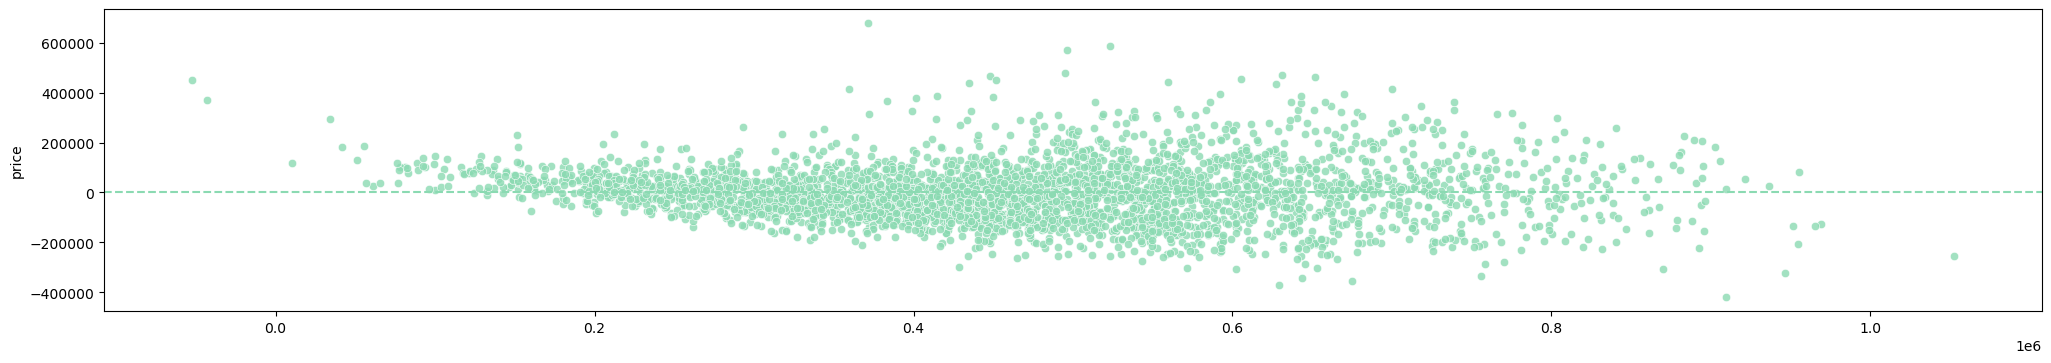

In [16]:
fig = plt.figure(figsize=(25,4),dpi=100)
sns.scatterplot(x=y_predict_baseline, y=residuals, alpha=0.8)
plt.axhline(0, ls='--')

#### Observation 
---
    - does not seems to have equal variance in both side.